In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading data from csv file
df = pd.read_csv("cs-training.csv")
df


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [2]:
# Summarize empty values
print(df.isna().sum())

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [3]:
# Drop columns from feature matrix
X_train = df.drop(["SeriousDlqin2yrs", "Unnamed: 0"], axis=1)
y_train = df["SeriousDlqin2yrs"]
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
y_train

0         1
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: SeriousDlqin2yrs, Length: 150000, dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

# Replace missing(NaN) values using the mean along each column using SimpleImputer 
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)
X_train = imp.transform(X_train)

In [6]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=9)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Using RandomForestCLassifier with pre-selected parametrs that gives the best cross-validation accuracy
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                            min_samples_leaf=8, min_samples_split=3,
                            n_estimators=150, random_state=9)

# Evaluating with cross_val_score using ROC accuracy
scores = cross_val_score(rfc, X_train, y_train, cv=5, n_jobs=-1, scoring='roc_auc')

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.86 (+/- 0.01)


In [8]:
# Fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

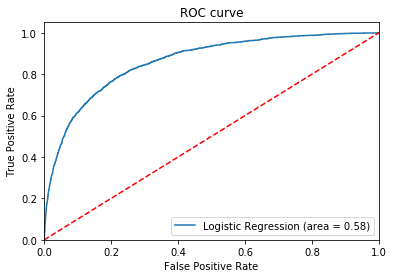

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Evalute model with ROC accuracy
roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
# Get predictions for plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [10]:
print("ROC AUC score: {:.2f}".format(roc_auc))

ROC AUC score: 0.58


In [11]:
# Read test data for make predictions
test_data = pd.read_csv('cs-test.csv')
# Drop prediction column from feature matrix
test_data = test_data.drop("SeriousDlqin2yrs", axis=1)
ids = test_data.pop("Unnamed: 0")
test_data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [12]:
# Transform data using SimpleImputer
test_data = imp.transform(test_data)
preds = rfc.predict_proba(test_data)

# Make predictions
preds = pd.DataFrame(preds, columns=['ID', 'Probability'])
preds["ID"] = ids
preds.head(20)

,ID,Probability
0,1,0.074704
1,2,0.033096
2,3,0.013940
3,4,0.079279
4,5,0.118300
5,6,0.035990
6,7,0.067090
7,8,0.046791
8,9,0.004764
9,10,0.337565


In [15]:
# Write to csv file
preds.to_csv('result.csv', index=False)